## Task 1: Load and Inspect the Data
Write Python code to load a dataset of your choice using a popular library such as pandas.
Inspect the dataset by printing the first few rows, checking the data types, and getting basic summary statistics.
use apropriate python library to get the data

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('titanic.csv')

# Print the first few rows
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Check the data types
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
# Get basic summary statistics
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#Task 2: Handle Missing Values
Write Python code to handle missing values in a dataset. This can involve techniques such as dropping rows/columns with missing values, imputing missing values with mean/median/mode, or using more advanced methods like regression or K-nearest neighbors

In [ ]:
# Check for missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# fill missing values with mean/median/mode
data['Age'] = data['Age'].fillna(data['Age'].mean())
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# Drop rows with missing values
data = data.dropna()
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Filling missing values using Linear Regression

In [ ]:
# loading housing dataset
dataset = pd.read_csv('Housing.csv')
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2


In [ ]:
# Check for missing values
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      3
CHAS       0
NOX        2
RM         0
AGE        1
DIS        0
RAD        1
TAX        0
PTRATIO    0
B          0
LSTAT      1
MEDV       0
dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression

# Assuming 'df' is your DataFrame containing the dataset

# Step 1: Identify predictor column
predictor_column = 'MEDV'

# Step 2: Split the dataset into subsets
subset_complete = dataset.dropna(subset=['RAD', 'LSTAT', 'INDUS', predictor_column])
subset_missing = dataset[dataset[['RAD', 'LSTAT', 'INDUS']].isna().any(axis=1)]

# Step 3: Train regression model
X = subset_complete[[predictor_column]]
y = subset_complete[['RAD']]  # Replace 'RAD' with 'LSTAT' or 'INDUS' accordingly
regression_model = LinearRegression()
regression_model.fit(X, y)

# Step 4: Predict missing values
X_missing = subset_missing[[predictor_column]]
y_missing_pred = regression_model.predict(X_missing)

# Step 5: Replace missing values
dataset.loc[dataset.index.isin(subset_missing.index), 'RAD'] = y_missing_pred.flatten()
# Replace 'RAD' with 'LSTAT' or 'INDUS' accordingly

# Check for missing values
dataset.isnull().sum()


CRIM       0
ZN         0
INDUS      3
CHAS       0
NOX        2
RM         0
AGE        1
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      1
MEDV       0
dtype: int64

### Filling missing values using K-nearest neighbors

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor


# Step 1: Identify predictor column
predictor_column = 'MEDV'

# Step 2: Split the dataset into subsets
subset_complete = dataset.dropna(subset=['RAD', 'LSTAT', 'INDUS', predictor_column])
subset_missing = dataset[dataset[['RAD', 'LSTAT', 'INDUS']].isna().any(axis=1)]

# Step 3: Train K-nearest neighbors model
X = subset_complete[[predictor_column]]
y = subset_complete[['RAD']]  # Replace 'RAD' with 'LSTAT' or 'INDUS' accordingly
knn_model = KNeighborsRegressor(n_neighbors=5)  # Adjust the number of neighbors as needed
knn_model.fit(X, y)

# Step 4: Predict missing values
X_missing = subset_missing[[predictor_column]]
y_missing_pred = knn_model.predict(X_missing)

# Step 5: Replace missing values
dataset.loc[dataset.index.isin(subset_missing.index), 'RAD'] = y_missing_pred.flatten()
# Replace 'RAD' with 'LSTAT' or 'INDUS' accordingly

## Check for missing values
dataset.isnull().sum()


CRIM       0
ZN         0
INDUS      3
CHAS       0
NOX        2
RM         0
AGE        1
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      1
MEDV       0
dtype: int64

#Task 3: Data Visualization
Using a plotting library such as Matplotlib or Seaborn, create visualizations to explore the data. This can include histograms, scatter plots, bar plots, box plots, or any other type of plot that helps in understanding the distribution and relationships between variables in the dataset.

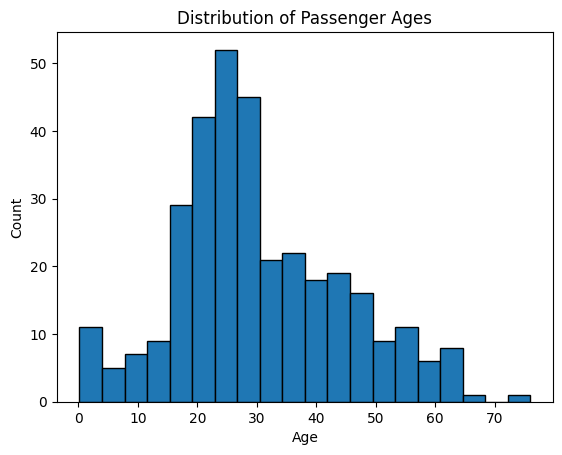

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Using titanic dataset

# Histogram of passenger ages
plt.hist(data['Age'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Passenger Ages')
plt.show()


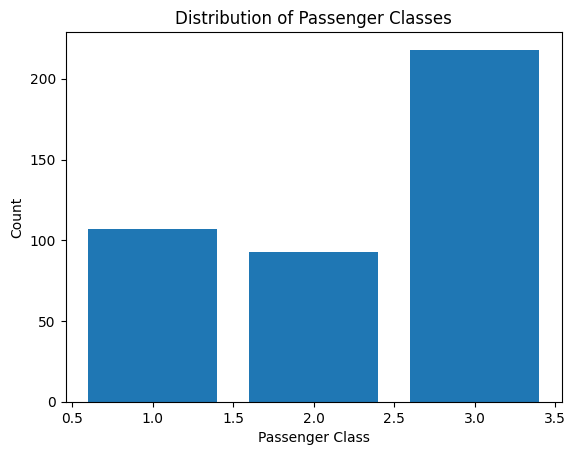

In [ ]:
# Bar plot of passenger classes
class_counts = data['Pclass'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Distribution of Passenger Classes')
plt.show()

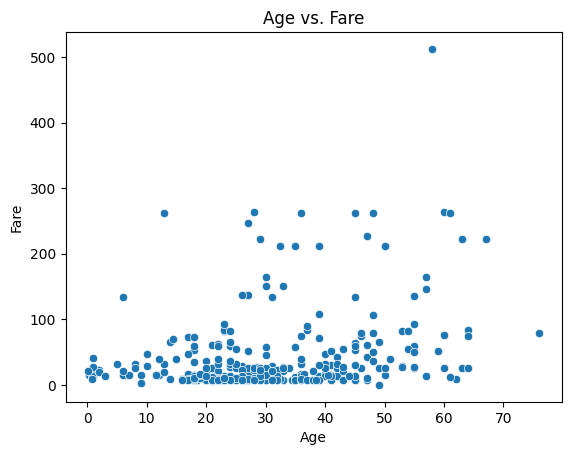

In [ ]:
# Scatter plot of age vs. fare
sns.scatterplot(x='Age', y='Fare', data=data)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare')
plt.show()

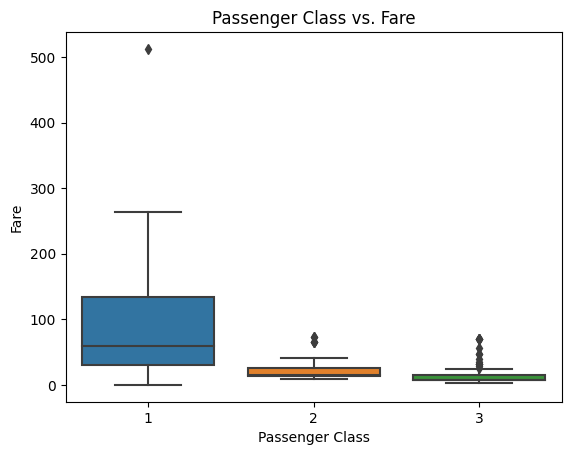

In [ ]:
# Box plot of passenger class vs. fare
sns.boxplot(x='Pclass', y='Fare', data=data)
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.title('Passenger Class vs. Fare')
plt.show()

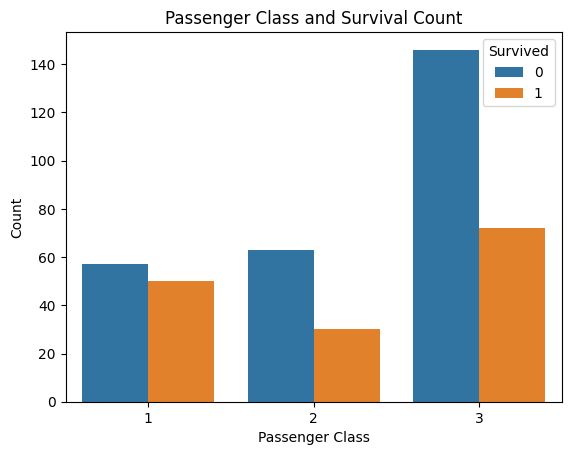

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Passenger Class and Survival Count')
plt.show()

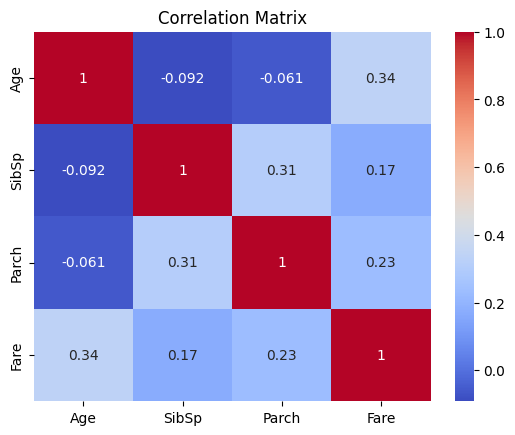

In [ ]:
# Select the numerical columns for correlation analysis
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']

# Compute the correlation matrix
corr_matrix = data[numerical_cols].corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Task 4: Data Transformation
Perform data transformation techniques such as scaling, normalization, or standardization on the dataset. This can help in improving the performance of certain algorithms, handling outliers, or ensuring that variables are on a similar scale.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scaling transforms the data to have a specific range
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

# Making dataframe of scaled data
scaled_df = pd.DataFrame(scaled_data,columns=dataset.columns)
scaled_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667
505,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
506,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
507,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardization transforms the data to have a mean of 0 and a standard deviation of 1

scaler = StandardScaler()
standardized_data = scaler.fit_transform(dataset)

# Making dataframe of scaled data
standardized_df = pd.DataFrame(standardized_data,columns=dataset.columns)
standardized_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.424278,0.288354,-1.297572,-0.271735,-0.149035,0.419995,-0.120309,0.143965,-0.986883,-0.671315,-1.465133,0.439860,-1.084256,0.163326
1,-0.421872,-0.485942,-0.602675,-0.271735,-0.746338,0.200859,0.367460,0.561674,-0.872182,-0.991508,-0.307420,0.439860,-0.500393,-0.098270
2,-0.421875,-0.485942,-0.602675,-0.271735,-0.746338,1.288004,-0.266284,0.561674,-0.872182,-0.991508,-0.307420,0.395366,-1.217590,1.329606
3,-0.421292,-0.485942,-1.316550,-0.271735,-0.841560,1.021909,-0.811019,1.083203,-0.757480,-1.110098,0.109357,0.415044,-1.370574,1.187908
4,-0.417088,-0.485942,-1.316550,-0.271735,-0.841560,1.233931,-0.511949,1.083203,-0.757480,-1.110098,0.109357,0.439860,-1.035133,1.493103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,-0.417824,-0.485942,0.106821,-0.271735,0.153945,0.445609,0.018545,-0.623447,-0.986883,-0.807694,1.174454,0.386183,-0.426006,-0.011071
505,-0.419814,-0.485942,0.106821,-0.271735,0.153945,-0.227453,0.289132,-0.714456,-0.986883,-0.807694,1.174454,0.439860,-0.508814,-0.207268
506,-0.418038,-0.485942,0.106821,-0.271735,0.153945,0.990604,0.798263,-0.771605,-0.986883,-0.807694,1.174454,0.439860,-0.991624,0.152426
507,-0.412440,-0.485942,0.106821,-0.271735,0.153945,0.731625,0.737737,-0.666165,-0.986883,-0.807694,1.174454,0.402144,-0.873728,-0.054670


In [ ]:
from sklearn.preprocessing import RobustScaler

# RobustScaler subtracts the median value from each feature and then divides it by the interquartile range
scaler = RobustScaler()
RobustScaler_data = scaler.fit_transform(dataset)

# Making dataframe of scaled data
RobustScaler_df = pd.DataFrame(RobustScaler_data,columns=dataset.columns)
RobustScaler_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.070722,1.44,-0.571650,0.0,0.000000,0.504736,-0.243753,0.300699,-0.20,-0.087855,-1.357143,0.260641,-0.651515,0.3500
1,-0.064909,0.00,-0.202943,0.0,-0.394286,0.296346,0.035696,0.591390,-0.15,-0.227390,-0.464286,0.260641,-0.231313,0.0500
2,-0.064915,0.00,-0.202943,0.0,-0.394286,1.330176,-0.327384,0.591390,-0.15,-0.227390,-0.464286,0.065997,-0.747475,1.6875
3,-0.063508,0.00,-0.581720,0.0,-0.457143,1.077131,-0.639470,0.954330,-0.10,-0.279070,-0.142857,0.152080,-0.857576,1.5250
4,-0.053350,0.00,-0.581720,0.0,-0.457143,1.278755,-0.468129,0.954330,-0.10,-0.279070,-0.142857,0.260641,-0.616162,1.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,-0.055128,0.00,0.173509,0.0,0.200000,0.529093,-0.164202,-0.233354,-0.20,-0.147287,0.678571,0.025825,-0.177778,0.1500
505,-0.059935,0.00,0.173509,0.0,0.200000,-0.110961,-0.009179,-0.296689,-0.20,-0.147287,0.678571,0.260641,-0.237374,-0.0750
506,-0.055645,0.00,0.173509,0.0,0.200000,1.047361,0.282509,-0.336460,-0.20,-0.147287,0.678571,0.260641,-0.584848,0.3375
507,-0.042122,0.00,0.173509,0.0,0.200000,0.801083,0.247833,-0.263083,-0.20,-0.147287,0.678571,0.095648,-0.500000,0.1000


# Task 5: Outlier Detection and Treatment
Write Python code to detect and handle outliers in the dataset. This can involve methods such as using z-scores or interquartile range (IQR) to identify outliers and then deciding whether to remove them or apply a transformation.

In [ ]:
import numpy as np

# Detect outliers using z-scores
z_scores = np.abs((data['Age'] - data['Age'].mean()) / data['Age'].std())
threshold = 3  # Adjust the threshold value as needed
outliers_z = data[z_scores > threshold]

# Detect outliers using IQR method
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1
threshold_low = Q1 - 1.5 * IQR
threshold_high = Q3 + 1.5 * IQR
outliers_iqr = data[(data['Fare'] < threshold_low) | (data['Fare'] > threshold_high)]

# Handle outliers (e.g., replace with NaN or remove rows)
data.loc[z_scores > threshold, 'Age'] = np.nan
data = data[~((data['Fare'] < threshold_low) | (data['Fare'] > threshold_high))]


In [ ]:
print("Outliers detected using z-scores:")
outliers_z


Outliers detected using z-scores:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.85,C46,S


In [ ]:
print("\nOutliers detected using IQR:")
outliers_iqr


Outliers detected using IQR:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
48,940,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C
53,945,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S
59,951,1,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,B61,C
64,956,0,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
69,961,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
74,966,1,1,"Geiger, Miss. Amalie",female,35.0,0,0,113503,211.5000,C130,C
75,967,0,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5000,C132,C
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S


### Outlier detection using DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# remove nan values from dataset
new_df = dataset.dropna()
new_df.reset_index(inplace=True)
new_df = new_df.drop('index',axis=1)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_df)

# Create DBSCAN instance
dbscan = DBSCAN(eps=1.5, min_samples=4)

# Fit the model
dbscan.fit(data_scaled)

# Get outlier labels (-1 indicates outliers)
outliers = new_df.loc[new_df.index[dbscan.labels_ == -1]]

# Print the indices of outliers
outliers


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
8,0.21124,12.5,7.87,0,0.5240,5.631,100.0,6.0821,5.0,311,15.2,386.63,29.93,16.5
18,0.80271,0.0,8.14,0,0.5380,5.456,36.6,3.7965,4.0,307,21.0,288.99,11.69,20.2
46,0.25387,0.0,6.91,0,0.4480,5.399,95.3,5.8700,3.0,233,17.9,396.90,30.81,14.4
52,0.01360,75.0,4.00,0,0.4100,5.888,47.6,7.3197,3.0,469,21.1,396.90,14.80,18.9
62,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3.0,216,18.6,393.24,8.05,33.0
93,0.08187,0.0,2.89,0,0.4450,7.820,36.9,3.4952,2.0,276,18.0,393.53,3.57,43.8
97,0.22876,0.0,8.56,0,0.5200,6.405,85.4,2.7147,5.0,384,20.9,70.80,10.63,18.6
134,1.62864,0.0,21.89,0,0.6240,5.019,100.0,1.4394,4.0,437,21.2,396.90,34.41,14.4
135,3.32105,0.0,19.58,1,0.8710,5.403,100.0,1.3216,5.0,403,14.7,396.90,26.82,13.4
138,2.37934,0.0,19.58,0,0.8710,6.130,100.0,1.4191,5.0,403,14.7,172.91,27.80,13.8


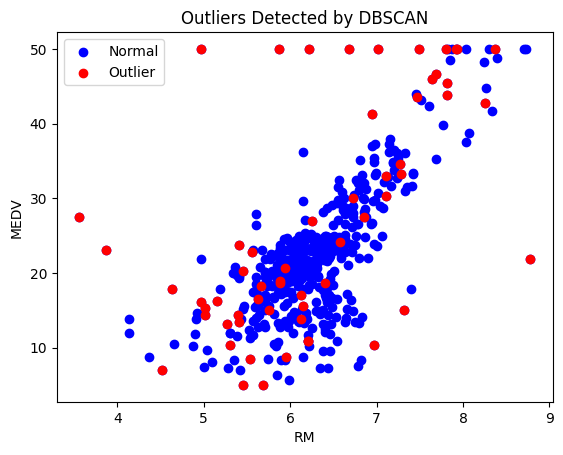

In [ ]:
# Plotting the original data
plt.scatter(new_df['RM'], new_df['MEDV'], color='blue', label='Normal')

# Plotting the outliers
plt.scatter(outliers['RM'], outliers['MEDV'], color='red', label='Outlier')

plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Outliers Detected by DBSCAN')
plt.legend()
plt.show()

### Outlier Detection using RANSAC

In [ ]:
from sklearn.linear_model import RANSACRegressor

# remove nan values from dataset
new_df = dataset.dropna()
new_df.reset_index(inplace=True)
new_df = new_df.drop('index',axis=1)

# Create RANSAC regressor with a linear model
ransac = RANSACRegressor()

# Fit the model to the data
ransac.fit(new_df[['RM']], new_df['MEDV'])

# Predict the inliers
inliers = new_df[ransac.inlier_mask_]

# Detect the outliers
outliers = new_df[~ransac.inlier_mask_]

# Display the outliers
print("Outliers:")
outliers

Outliers:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5.0,311,15.2,396.90,19.15,27.1
10,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5.0,311,15.2,392.52,20.45,15.0
18,0.80271,0.0,8.14,0,0.538,5.456,36.6,3.7965,4.0,307,21.0,288.99,11.69,20.2
22,1.23247,0.0,8.14,0,0.538,6.142,91.7,3.9769,4.0,307,21.0,396.90,18.72,15.2
27,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4.0,307,21.0,306.38,17.28,14.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6.0,391,19.2,396.90,21.14,19.7
497,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1.0,273,21.0,391.99,9.67,22.4
499,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1.0,273,21.0,396.90,5.64,23.9
500,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1.0,273,21.0,393.45,6.48,22.0


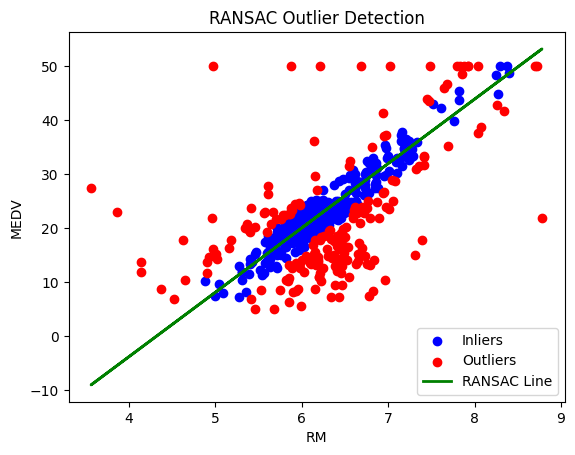

In [ ]:
import matplotlib.pyplot as plt

# Plotting the inliers and outliers
plt.scatter(inliers['RM'], inliers['MEDV'], color='blue', label='Inliers')
plt.scatter(outliers['RM'], outliers['MEDV'], color='red', label='Outliers')

# Plotting the RANSAC line
plt.plot(new_df['RM'], ransac.predict(new_df[['RM']]), color='green', linewidth=2, label='RANSAC Line')

# Adding labels and title
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('RANSAC Outlier Detection')
plt.legend()

# Display the plot
plt.show()


### Outlier detection using Mahalanobis distance

In [ ]:
import numpy as np
from scipy.spatial.distance import mahalanobis

# remove nan values from dataset
new_df = dataset.dropna()
new_df.reset_index(inplace=True)
new_df = new_df.drop('index',axis=1)

# Calculate the mean and covariance matrix
mean = new_df.mean()
covariance = new_df.cov()

# Calculate the Mahalanobis distance for each data point
mahalanobis_dist = np.array([mahalanobis(row, mean, np.linalg.inv(covariance)) for _, row in new_df.iterrows()])

# Define the threshold for outlier detection (adjust as needed)
threshold = 6

# Find the outliers based on the Mahalanobis distance exceeding the threshold
outliers = new_df[mahalanobis_dist > threshold]

print("Outliers:")
outliers

Outliers:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
145,1.12658,0.0,19.58,1,0.871,5.012,88.0,1.6102,5.0,403,14.7,343.28,12.12,15.3
148,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5.0,403,14.7,88.01,15.02,15.6
207,0.28955,0.0,10.59,0,0.489,5.412,9.8,3.5875,4.0,277,18.6,348.93,29.55,23.7
346,0.01709,90.0,2.02,0,0.410,6.728,36.1,12.1265,5.0,187,17.0,384.46,4.50,30.1
357,3.47428,0.0,18.10,1,0.718,8.780,82.9,1.9047,24.0,666,20.2,354.55,5.29,21.9
358,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.70,7.12,27.5
360,13.52220,0.0,18.10,0,0.631,3.863,100.0,1.5106,24.0,666,20.2,131.42,13.33,23.1
361,4.89822,0.0,18.10,0,0.631,4.970,100.0,1.3325,24.0,666,20.2,375.52,3.26,50.0
362,5.66998,0.0,18.10,1,0.631,6.683,96.8,1.3567,24.0,666,20.2,375.33,3.73,50.0
363,6.53876,0.0,18.10,1,0.631,7.016,97.5,1.2024,24.0,666,20.2,392.05,2.96,50.0


# Task 6: Feature Engineering
Perform feature engineering on the dataset to create new variables or modify existing ones. This can include techniques such as one-hot encoding, binning, creating interaction terms, or deriving new features based on domain knowledge.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# remove nan values from dataset
df = data.dropna()
df.reset_index(inplace=True)
df = df.drop('index',axis=1)

# Title Extraction
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# IsAlone
df['IsAlone'] = np.where(df['FamilySize'] == 1, 1, 0)

# Age Binning
bins = [0, 12, 18, 30, 50, 100]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Elderly']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Fare Binning
fare_bins = [0, 10, 20, 30, 1000]
fare_labels = ['Low', 'Medium', 'High', 'Very High']
df['FareGroup'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, right=False)

# Cabin Letter
df['CabinLetter'] = df['Cabin'].str[:1]

# Fare per Person
df['FarePerPerson'] = df['Fare'] / df['FamilySize']

# Embarked Encoding using OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
embarked_encoded = encoder.fit_transform(df['Embarked'].values.reshape(-1, 1))
embarked_cols = pd.DataFrame(embarked_encoded, columns=['Embarked_' + val for val in encoder.categories_[0]])
df = pd.concat([df, embarked_cols], axis=1)

# Drop unnecessary columns
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)

# Print the updated dataframe
df.head()


,Survived,Pclass,Sex,Age,Title,FamilySize,IsAlone,AgeGroup,FareGroup,CabinLetter,FarePerPerson,Embarked_C,Embarked_S
0,1,1,female,47.0,Mrs,2,0,Adult,Very High,E,30.5875,0.0,1.0
1,1,1,female,22.0,Miss,2,0,Young Adult,Very High,B,30.9896,1.0,0.0
2,0,1,male,41.0,Mr,1,1,Adult,Very High,A,30.5000,0.0,1.0
3,0,1,male,30.0,Mr,2,0,Adult,Very High,C,28.8750,1.0,0.0
4,1,1,female,45.0,Mrs,2,0,Adult,Very High,D,26.2771,0.0,1.0


# Task 7: Correlation Analysis
Compute and analyze the correlation between variables in the dataset. Use Python code to calculate correlation coefficients such as Pearson's correlation, Spearman's correlation, or Kendall's correlation. Visualize the correlation matrix using a heatmap to identify strong relationships between variables.

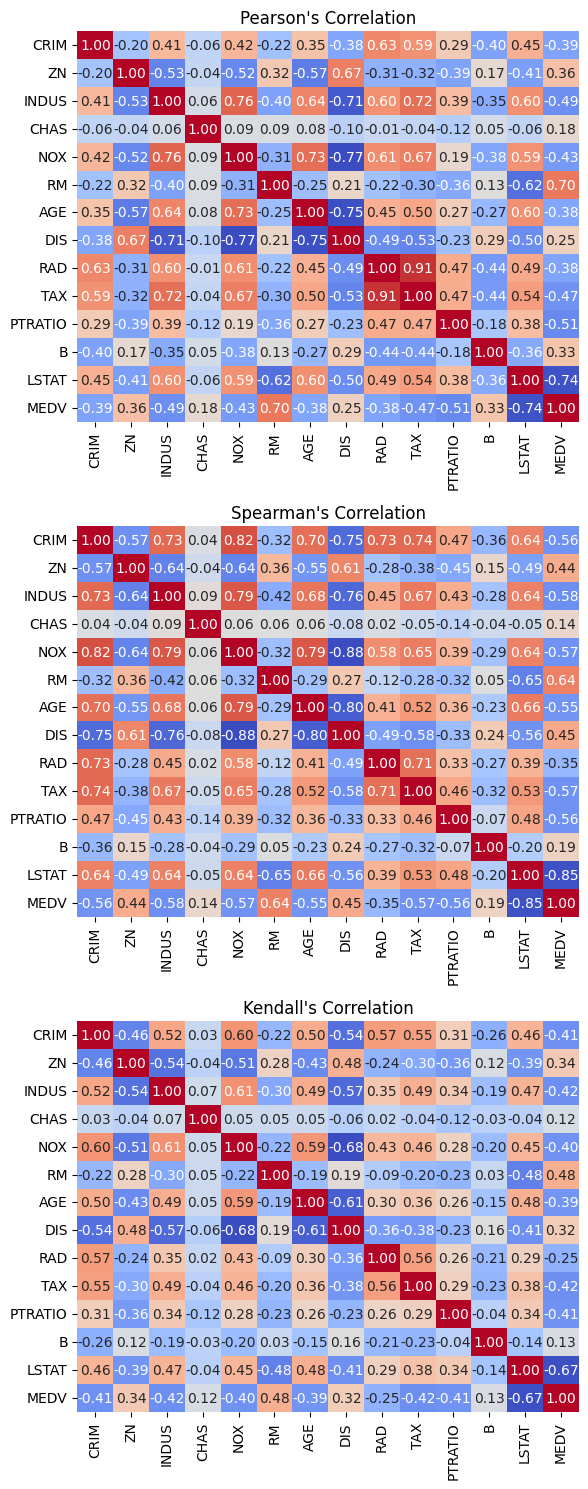

In [ ]:
# remove nan values from dataset
df = dataset.dropna()
df.reset_index(inplace=True)
df = df.drop('index',axis=1)

# Calculate correlation coefficients
correlation_pearson = df.corr(method='pearson')
correlation_spearman = df.corr(method='spearman')
correlation_kendall = df.corr(method='kendall')

# Plot correlation matrix heatmap
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6,15))

sns.heatmap(correlation_pearson, ax=axes[0], cmap='coolwarm', annot=True, fmt=".2f", cbar=False)
axes[0].set_title("Pearson's Correlation")

sns.heatmap(correlation_spearman, ax=axes[1], cmap='coolwarm', annot=True, fmt=".2f", cbar=False)
axes[1].set_title("Spearman's Correlation")

sns.heatmap(correlation_kendall, ax=axes[2], cmap='coolwarm', annot=True, fmt=".2f", cbar=False)
axes[2].set_title("Kendall's Correlation")

plt.tight_layout()
plt.show()



# Task 8: Dimensionality Reduction
Apply dimensionality reduction techniques to reduce the number of features in the dataset while retaining important information. Use methods such as Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA), or t-SNE to visualize high-dimensional data in lower-dimensional space.

### Dimensionality reduction using PCA

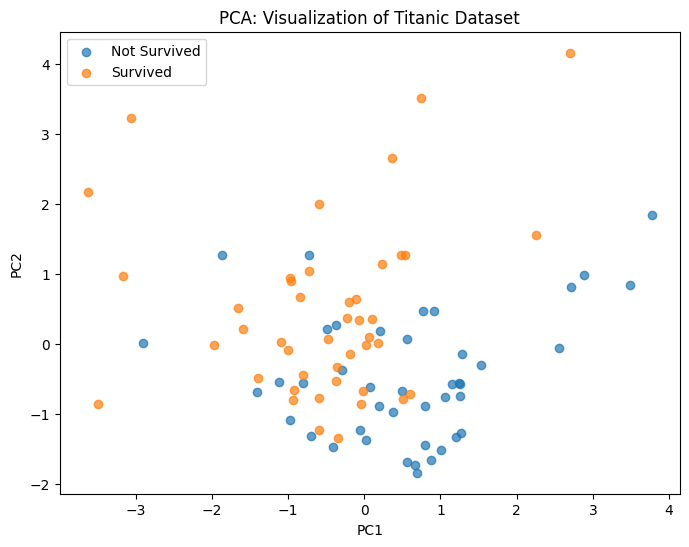

In [ ]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# remove nan values from dataset
data = pd.read_csv('titanic.csv').dropna()
data.reset_index(inplace=True)
data = data.drop('index',axis=1)

# Drop irrelevant columns
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Encoding categorical variables
encoder = OneHotEncoder(drop='first')
encoded_features = pd.DataFrame(encoder.fit_transform(data[['Sex', 'Embarked']]).toarray(),
                                columns=encoder.get_feature_names_out(['Sex', 'Embarked']))
data.drop(['Sex', 'Embarked'], axis=1, inplace=True)
data = pd.concat([data, encoded_features], axis=1)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('Survived', axis=1))

# # Apply PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Create a new DataFrame with the reduced features and the target variable
reduced_data = pd.DataFrame(data=reduced_features, columns=['PC1','PC2'])
reduced_data['Survived'] = data['Survived'].copy()


# Plot the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data.loc[reduced_data['Survived'] == 0, 'PC1'],
            reduced_data.loc[reduced_data['Survived'] == 0, 'PC2'],
            label='Not Survived', alpha=0.7)
plt.scatter(reduced_data.loc[reduced_data['Survived'] == 1, 'PC1'],
            reduced_data.loc[reduced_data['Survived'] == 1, 'PC2'],
            label='Survived', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: Visualization of Titanic Dataset')
plt.legend()
plt.show()


### Dimensionality reduction using LDA

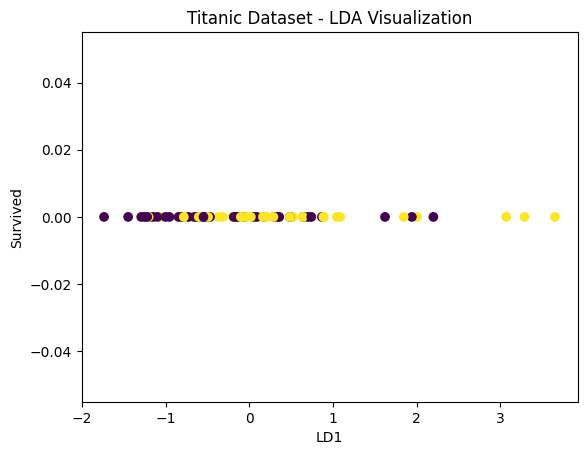

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# remove nan values from dataset
df = pd.read_csv('titanic.csv').dropna()
df.reset_index(inplace=True)
df = df.drop('index',axis=1)

# Drop irrelevant columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Standardize the numerical features
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Separate the features (X) and the target variable (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Perform LDA and obtain the transformed features
lda = LDA(n_components=1)  # We choose to reduce the features to 1 dimension for visualization purposes
X_lda = lda.fit_transform(X, y)

# Create a scatter plot of the transformed features
plt.scatter(X_lda, np.zeros_like(X_lda), c=y, cmap='viridis')
plt.xlabel('LD1')
plt.ylabel('Survived')
plt.title('Titanic Dataset - LDA Visualization')
plt.show()


### Dimensionality reduction using t-SNE

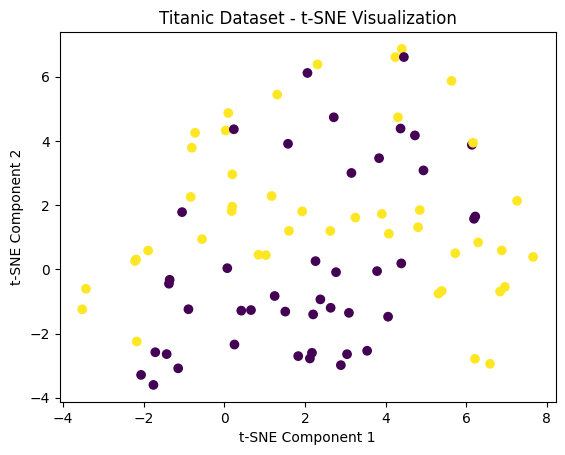

In [ ]:
from sklearn.manifold import TSNE

# remove nan values from dataset
df = pd.read_csv('titanic.csv').dropna()
df.reset_index(inplace=True)
df = df.drop('index',axis=1)

# Drop unnecessary columns (
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Standardize the numerical features
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Separate the features (X) and the target variable (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Perform t-SNE and obtain the transformed features
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a scatter plot of the transformed features
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Titanic Dataset - t-SNE Visualization')
plt.show()

